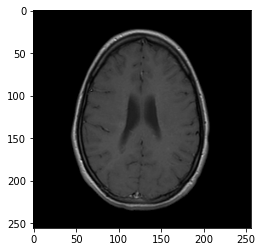

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import required image module
from PIL import Image
import cv2

# open the binary data file as binary_file
with open("mri-a.raw", "rb") as binary_file:
    #read in the entire data set as an 1-d array
    data = np.fromfile(binary_file, dtype=np.ubyte)

# reshape the data into row * col 
data = data.reshape([256,256])
#display the image, and use the color map gray
plt.imshow(data, cmap='gray')
plt.show()



In [ ]:
#1.(a)

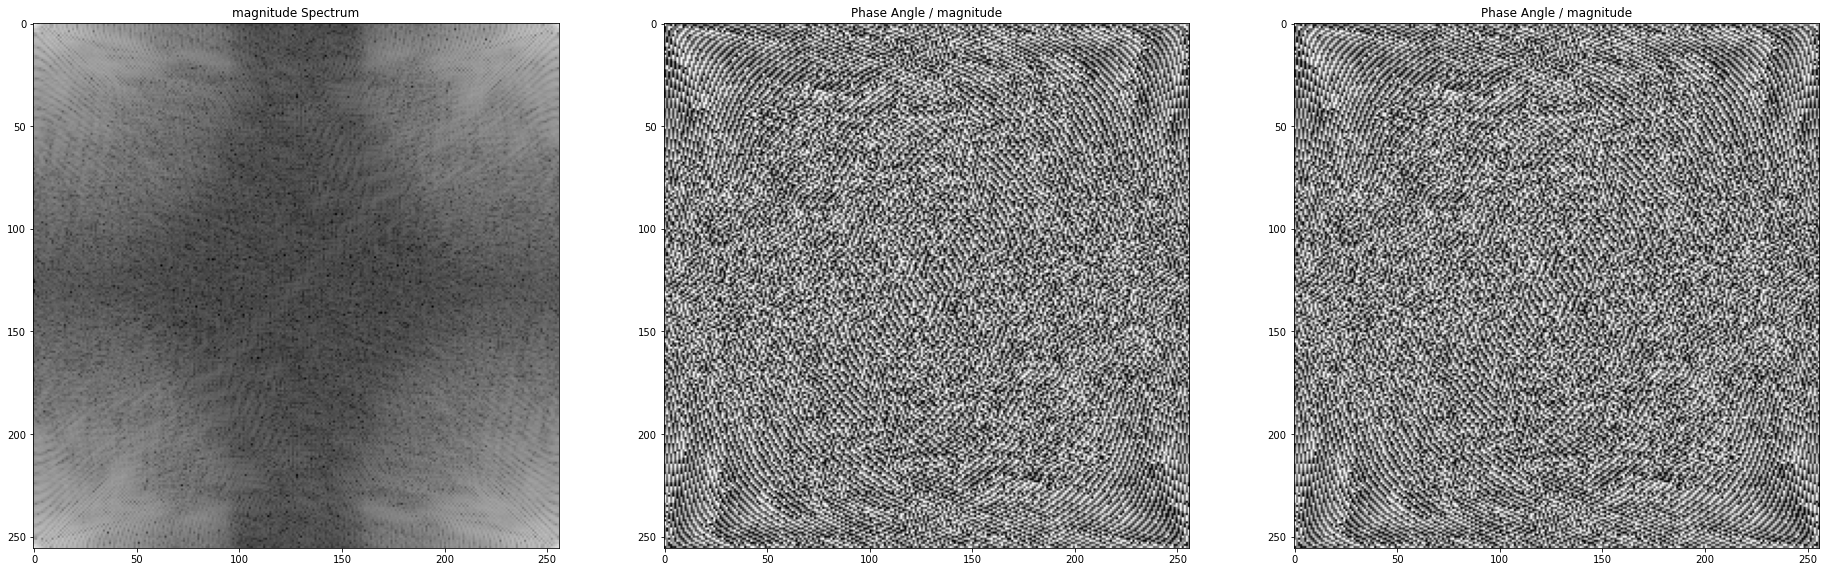

In [3]:
#1.(b) Plot magnitude and phase responses 
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = data
original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("magnitude Spectrum")
plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle / responses")
plt.subplot(133), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle / responses")

plt.show()

In [ ]:
#1.(c) extract phase response of image to add pi, then inverse it by IDFT



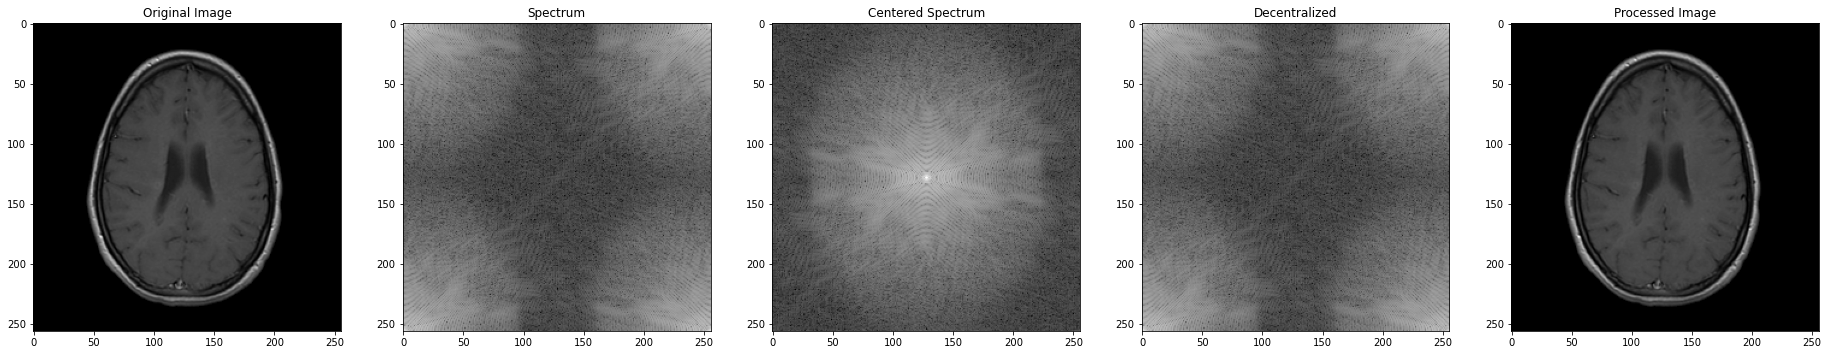

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#img_c1 = cv2.imread("left01.jpg", 0)
img_c1=data
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

In [ ]:
# Read the images in   
#Image1=double(imread('/home/anelmad/Desktop/ml/signal_images_processing/tp6/barbara.png'))/255;
#Image2=double(imread('/home/anelmad/Desktop/ml/signal_images_processing/tp6/lena.bmp'))/255;

# Find dimensions and extent of the FFT
Image1 = data
[rows1, cols1] = size(Image1);
[rows2, cols2] = size(Image2);

rows = max(rows1, rows2);
cols = max(cols1, cols2);

% Take the FFT
Image1_FFT=fft2(Image1, rows, cols);
Image2_FFT=fft2(Image2, rows, cols);

% NEW - Find the magnitudes and phase responses
mag1 = abs(Image1_FFT);
mag2 = abs(Image2_FFT);
pha1 = angle(Image1_FFT);
pha2 = angle(Image2_FFT);

% Recompute frequency responses by swapping the phases
out1 = mag1 .* exp(j*pha2);
out2 = mag2 .* exp(j*pha1);

% Find the inverse images
out1 = real(ifft2(out1));
out2 = real(ifft2(out2));

% Show the images
figure;
imshow(out1, []);
figure;
imshow(out2, []);

Text(0.5, 1.0, 'constant')

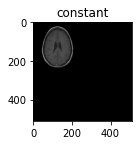

In [28]:
#3.(a)

import cv2
import numpy as np
import matplotlib.pyplot as plt


# 讀取圖片
img = data
# 各個邊界需要填充的值
top_size, bottom_size, left_size, right_size = (0, 255, 0, 255)
# 常量法，常數值填充
padding0 = cv2.copyMakeBorder(img, top_size, bottom_size,
                               left_size, right_size,
                               borderType=cv2.BORDER_CONSTANT,
                              value=(0, 255, 0))

plt.subplot(236)
plt.imshow(padding0, 'gray')
plt.title('constant')

In [ ]:

dft = cv2.dft(data, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 



In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('aa.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

In [2]:
print(type(data))


<class 'numpy.ndarray'>


In [3]:
print(data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
#3.(a)
#It is important for the conversion to gray scale, 
#the imread function will have the channels stored in BGR (Blue, Green and Red) order by default [1].
import cv2
 
image_me = cv2.imread('109003814.jpg', cv2.IMREAD_UNCHANGED)
print(image.shape)

gray = cv2.cvtColor(image_me, cv2.COLOR_BGR2GRAY)

cv2.imshow("image", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Filename
filename = '109003814_gray.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, gray)

(1836, 3264, 3)


True

In [57]:
import cv2
 
print('Original Dimensions : ',image_me.shape)

print(image_me.shape)

height, width, channels = image_me.shape
print(height, width, channels)

dim = (256,256)

# resize image
resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ', resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Using cv2.imwrite() method
# Saving the image
filename_resized = '109003814_resized.jpg'
cv2.imwrite(filename_resized, resized)

Original Dimensions :  (1836, 3264, 3)
(1836, 3264, 3)
1836 3264 3
Resized Dimensions :  (256, 256)


True

In [ ]:
import cv2
 
print('resized Dimensions : ', image_me.shape)
 
    
height, width, channels = image_me.shape
print(height, width, channels)

dim = (width,height)

# resize image
resized2Orig = cv2.resize(resized, dim, interpolation = cv2.INTER_AREA)
 
print('Resized to original Dimensions : ',resized2Orig.shape)
 
cv2.imshow("Resized image", resized2Orig)
cv2.waitKey(0)
cv2.destroyAllWindows()
filename_resized2Orig = '109003814_resized2Orig.jpg'
cv2.imwrite(filename_resized2Orig, resized2Orig)

resized Dimensions :  (1836, 3264, 3)
1836 3264 3
Resized to original Dimensions :  (1836, 3264)
